In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import re
import folium

from wordcloud import STOPWORDS
from wordcloud import WordCloud
from collections import Counter

#from langdetect import detect
#from langdetect.lang_detect_exception import LangDetectException

In [2]:
#!pip install wordcloud

In [3]:
df = pd.read_pickle(r'\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\eda.pkl')
df

,review_date,Comments,Listing ID,Listing Name,Host ID,Host Response Time,Host Response Rate,Is Superhost,Neighborhood Group,Latitude,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,review_mnt,Host_tenure
45,2018-01-24,Caroline war eine sehr nette Gastgeberin. Sie ...,10008354,Cosy studio in Weserstr.,26193350,unknown,0.0,False,NeukÃÂ¶lln,52.47888,...,91.0,9.0,9.0,10.0,10.0,9.0,9.0,True,1,3.956194
64,2018-04-07,Check-in/-out verlief reibungslos!KÃÂ¼nstleri...,10012243,Raw / Minimalist Apartment NeukÃÂ¶lln,51421188,unknown,0.0,False,NeukÃÂ¶lln,52.48730,...,92.0,10.0,9.0,10.0,10.0,9.0,9.0,True,4,3.044490
65,2018-04-22,FÃÂ¼r ein WE Ausflug fÃÂ¼r Paare geeignet. D...,10012243,Raw / Minimalist Apartment NeukÃÂ¶lln,51421188,unknown,0.0,False,NeukÃÂ¶lln,52.48730,...,92.0,10.0,9.0,10.0,10.0,9.0,9.0,True,4,3.044490
66,2018-05-28,Fritz has a really nice flat in a cosy neighbo...,10012243,Raw / Minimalist Apartment NeukÃÂ¶lln,51421188,unknown,0.0,False,NeukÃÂ¶lln,52.48730,...,92.0,10.0,9.0,10.0,10.0,9.0,9.0,True,5,3.044490
71,2018-09-30,"Carlos place is amazing, nicely decorated, goo...",10012834,Two cozy rooms in Kreuzberg,47884220,unknown,0.0,False,Friedrichshain-Kreuzberg,52.50288,...,100.0,10.0,10.0,9.0,10.0,10.0,10.0,False,9,3.164956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456921,2018-12-15,"Great location; comfortable, clean & quiet acc...",9994644,Potsdamer Platz-Top Spot Studio 1,22276081,within an hour,1.0,True,Friedrichshain-Kreuzberg,52.50283,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,12,4.229979
456922,2018-12-17,Great location and great host. Martin provides...,9994644,Potsdamer Platz-Top Spot Studio 1,22276081,within an hour,1.0,True,Friedrichshain-Kreuzberg,52.50283,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,12,4.229979
456923,2018-12-24,This place is awesome! it has everything from ...,9994644,Potsdamer Platz-Top Spot Studio 1,22276081,within an hour,1.0,True,Friedrichshain-Kreuzberg,52.50283,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,12,4.229979
456924,2018-12-27,"Martin's home is great, the location is perfec...",9994644,Potsdamer Platz-Top Spot Studio 1,22276081,within an hour,1.0,True,Friedrichshain-Kreuzberg,52.50283,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,True,12,4.229979


## Word Cloud
#### Building a word cloud containing the most frequent words in the Listing Name.

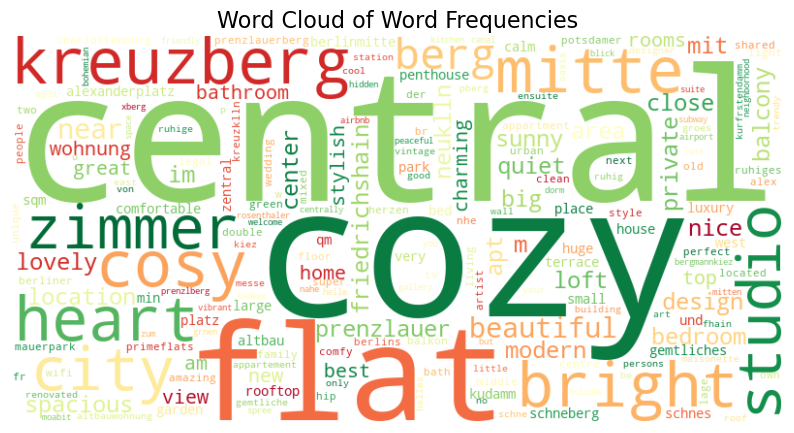

In [4]:
# Function to clean and preprocess text
def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text.lower())

# Set of stop words to ignore
stop_words = {'in', 'of', 'and', 'the', 'to', 'for', 'a', 'an', 'on', 'at', 'with'
              ,'as', 'by', 'from', 'it', 'this', 'that','berlin','room','apartment'}

# Convert 'Listing Name' column to strings if not already
df['Listing Name'] = df['Listing Name'].astype(str)

# Split the 'Listing Name' into words, clean them, and remove stop words
words = df['Listing Name'].apply(clean_text).str.split()
flat_words = [word for sublist in words for word in sublist if word not in stop_words]

# Count word frequencies
word_counts = Counter(flat_words)

# Create the word cloud using squared frequencies
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='RdYlGn',  # Green to Red color map
    max_words=200,      # Max number of words to display
    relative_scaling=0,  # Use absolute frequencies for sizing
    normalize_plurals=False
).generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Word Frequencies', fontsize=16)
plt.show()

## NLP
#### Sentiment analysis was performed on the text in the "comments" field.

In [5]:
# Load dataset
df_nlp = pd.read_csv(r"\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\Final Project\Comments_Text_Analysis.csv")


In [6]:
df_nlp.head()

,Comments,Review ID,Listing ID,Is_English,Sentiment
0,Fritz has a really nice flat in a cosy neighbo...,269857683.0,10012243,True,1
1,"Carlos place is amazing, nicely decorated, goo...",329973125.0,10012834,True,1
2,"Nice and confortable place, perfect with kids,...",248757642.0,10029891,True,1
3,Great apartment. About a 10 min walk from the...,223471676.0,10031729,True,1
4,"Cosy and well situated apartment, exatly as de...",225091235.0,10031729,True,1


In [7]:
df_nlp['Sentiment'].value_counts()

Sentiment
 1    98826
 0     3604
-1     1112
Name: count, dtype: int64

In [8]:
df_nlp['Sentiment_Nut'] = (df_nlp['Sentiment'] == 0).astype(int)
df_nlp['Sentiment_Neg'] = (df_nlp['Sentiment'] == -1).astype(int)
df_nlp['Sentiment_Pos'] = (df_nlp['Sentiment'] == 1).astype(int)

summary = df_nlp.groupby('Listing ID')['Sentiment'].agg(
    sentiment_count='count',  # מספר הפעמים שמופיעה כל Listing ID
).reset_index()

In [9]:
df_nlp_grp = df_nlp.groupby('Listing ID')[['Sentiment_Nut', 'Sentiment_Neg', 'Sentiment_Pos']].sum().reset_index() 

In [10]:
df_nlp_grp['Sentiment_All'] = (df_nlp_grp['Sentiment_Neg'] + df_nlp_grp['Sentiment_Pos'] + df_nlp_grp['Sentiment_Nut'])
df_nlp_grp['Sentiment_Nut_per'] = df_nlp_grp['Sentiment_Nut'] / (df_nlp_grp['Sentiment_Neg'] + df_nlp_grp['Sentiment_Pos'] + df_nlp_grp['Sentiment_Nut']).replace(0, np.nan) 
df_nlp_grp['Sentiment_Neg_per'] = df_nlp_grp['Sentiment_Neg'] / (df_nlp_grp['Sentiment_Neg'] + df_nlp_grp['Sentiment_Pos'] + df_nlp_grp['Sentiment_Nut']).replace(0, np.nan) 
df_nlp_grp['Sentiment_Pos_per'] = df_nlp_grp['Sentiment_Pos'] / (df_nlp_grp['Sentiment_Neg'] + df_nlp_grp['Sentiment_Pos'] + df_nlp_grp['Sentiment_Nut']).replace(0, np.nan) 
df_nlp_grp.drop(['Sentiment_Nut', 'Sentiment_Pos','Sentiment_Neg'], axis=1, inplace=True)


In [11]:
df_nlp_grp

,Listing ID,Sentiment_All,Sentiment_Nut_per,Sentiment_Neg_per,Sentiment_Pos_per
0,2695,6,0.0,0.0,1.0
1,7071,34,0.0,0.0,1.0
2,9991,1,0.0,0.0,1.0
3,14325,1,0.0,0.0,1.0
4,17904,27,0.0,0.0,1.0
...,...,...,...,...,...
11450,31144871,1,0.0,0.0,1.0
11451,31161939,1,0.0,0.0,1.0
11452,31171455,1,0.0,0.0,1.0
11453,31185236,1,1.0,0.0,0.0


## Map

## Group by listing Id
#### Aggregation of the variables at the "Listing ID" level.

In [12]:
# Define the groupby column and lists
groupby = ['Listing ID']

mean = ['Host Response Rate', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included',
        'Min Nights', 'Reviews', 'Overall Rating', 'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating',
        'Communication Rating', 'Location Rating', 'Value Rating', 'review_mnt', 'Host_tenure']

dele = ['Host ID', 'Comments', 'Listing Name', 'Latitude', 'Longitude','First Review', 'Last Review']

first = ['Host Response Time', 'Is Superhost', 'Neighborhood Group', 'Is Exact Location', 'Property Type',
         'Room Type',  'Instant Bookable']

count = ['review_date']  # New list for count aggregation

# Group by 'Listing ID' and aggregate according to the provided lists
grouped = df.groupby(groupby).agg({
    **{col: 'mean' for col in mean},  # Apply mean aggregation to columns in 'mean'
    **{col: 'first' for col in first},  # Apply first aggregation to columns in 'first'
    **{col: 'sum' for col in ['Reviews']},  # Sum reviews separately (if necessary)
    **{col: 'count' for col in count}  # Apply count aggregation to columns in 'count'
}).reset_index()

# Optionally, drop unwanted columns (from the 'dele' list)
df_grouped = grouped.drop(columns=dele, errors='ignore')  # 'errors=ignore' ensures no error if some columns are missing
#df_grouped['Total Bookings'] = df_grouped['review_date']
df_grouped.rename(columns={'review_date': 'Total Bookings'}, inplace=True)

# Print the grouped DataFrame
df_grouped



,Listing ID,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,...,review_mnt,Host_tenure,Host Response Time,Is Superhost,Neighborhood Group,Is Exact Location,Property Type,Room Type,Instant Bookable,Total Bookings
0,2695,0.5,2.0,1.0,1.0,1.0,17.0,1.0,2.0,42.0,...,8.5,10.288843,within a day,False,Pankow,True,Apartment,Private room,False,6
1,3176,0.5,4.0,1.0,1.0,2.0,90.0,2.0,62.0,144.0,...,10.0,10.198494,within a day,False,Pankow,True,Apartment,Entire home/apt,False,1
2,7071,1.0,2.0,1.0,1.0,2.0,33.0,1.0,2.0,10076.0,...,7.659091,9.626283,within an hour,True,Pankow,True,Apartment,Private room,False,44
3,9991,1.0,7.0,2.5,4.0,7.0,180.0,5.0,6.0,6.0,...,7.0,9.349760,within a day,False,Pankow,False,Apartment,Entire home/apt,False,1
4,14325,1.0,1.0,1.0,0.0,1.0,70.0,1.0,90.0,23.0,...,11.0,9.117043,within a day,False,Pankow,True,Apartment,Entire home/apt,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,31144871,1.0,2.0,1.0,1.0,1.0,25.0,1.0,2.0,15.0,...,12.0,2.255989,within an hour,False,Mitte,True,Condominium,Private room,False,1
12213,31161939,0.9,2.0,1.0,1.0,2.0,25.0,1.0,2.0,14.0,...,12.0,0.008214,within a few hours,False,NeukÃÂ¶lln,False,Apartment,Private room,False,1
12214,31171455,1.0,4.0,1.0,1.0,2.0,110.0,2.0,1.0,40.0,...,12.0,3.173169,within an hour,False,Mitte,True,Apartment,Entire home/apt,True,1
12215,31185236,1.0,1.0,1.0,1.0,1.0,40.0,1.0,1.0,10.0,...,12.0,0.876112,within a few hours,False,Pankow,True,Bed and breakfast,Private room,True,1


## Adding NLP to data after agregation
#### Merging the data obtained through NLP analysis.

In [13]:
df_grouped = pd.merge(df_grouped, df_nlp_grp, on='Listing ID', how='left') 
df_grouped

,Listing ID,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,...,Neighborhood Group,Is Exact Location,Property Type,Room Type,Instant Bookable,Total Bookings,Sentiment_All,Sentiment_Nut_per,Sentiment_Neg_per,Sentiment_Pos_per
0,2695,0.5,2.0,1.0,1.0,1.0,17.0,1.0,2.0,42.0,...,Pankow,True,Apartment,Private room,False,6,6.0,0.0,0.0,1.0
1,3176,0.5,4.0,1.0,1.0,2.0,90.0,2.0,62.0,144.0,...,Pankow,True,Apartment,Entire home/apt,False,1,NaN,NaN,NaN,NaN
2,7071,1.0,2.0,1.0,1.0,2.0,33.0,1.0,2.0,10076.0,...,Pankow,True,Apartment,Private room,False,44,34.0,0.0,0.0,1.0
3,9991,1.0,7.0,2.5,4.0,7.0,180.0,5.0,6.0,6.0,...,Pankow,False,Apartment,Entire home/apt,False,1,1.0,0.0,0.0,1.0
4,14325,1.0,1.0,1.0,0.0,1.0,70.0,1.0,90.0,23.0,...,Pankow,True,Apartment,Entire home/apt,False,1,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,31144871,1.0,2.0,1.0,1.0,1.0,25.0,1.0,2.0,15.0,...,Mitte,True,Condominium,Private room,False,1,1.0,0.0,0.0,1.0
12213,31161939,0.9,2.0,1.0,1.0,2.0,25.0,1.0,2.0,14.0,...,NeukÃÂ¶lln,False,Apartment,Private room,False,1,1.0,0.0,0.0,1.0
12214,31171455,1.0,4.0,1.0,1.0,2.0,110.0,2.0,1.0,40.0,...,Mitte,True,Apartment,Entire home/apt,True,1,1.0,0.0,0.0,1.0
12215,31185236,1.0,1.0,1.0,1.0,1.0,40.0,1.0,1.0,10.0,...,Pankow,True,Bed and breakfast,Private room,True,1,1.0,1.0,0.0,0.0


In [14]:
df_grouped['Sentiment_Nut_per'] = df_grouped['Sentiment_Nut_per'].fillna(0) 
df_grouped['Sentiment_Neg_per'] = df_grouped['Sentiment_Neg_per'].fillna(0) 
df_grouped['Sentiment_Pos_per'] = df_grouped['Sentiment_Pos_per'].fillna(0) 
df_grouped['Sentiment_All'] = df_grouped['Sentiment_All'].fillna(0) 
df_grouped

,Listing ID,Host Response Rate,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,...,Neighborhood Group,Is Exact Location,Property Type,Room Type,Instant Bookable,Total Bookings,Sentiment_All,Sentiment_Nut_per,Sentiment_Neg_per,Sentiment_Pos_per
0,2695,0.5,2.0,1.0,1.0,1.0,17.0,1.0,2.0,42.0,...,Pankow,True,Apartment,Private room,False,6,6.0,0.0,0.0,1.0
1,3176,0.5,4.0,1.0,1.0,2.0,90.0,2.0,62.0,144.0,...,Pankow,True,Apartment,Entire home/apt,False,1,0.0,0.0,0.0,0.0
2,7071,1.0,2.0,1.0,1.0,2.0,33.0,1.0,2.0,10076.0,...,Pankow,True,Apartment,Private room,False,44,34.0,0.0,0.0,1.0
3,9991,1.0,7.0,2.5,4.0,7.0,180.0,5.0,6.0,6.0,...,Pankow,False,Apartment,Entire home/apt,False,1,1.0,0.0,0.0,1.0
4,14325,1.0,1.0,1.0,0.0,1.0,70.0,1.0,90.0,23.0,...,Pankow,True,Apartment,Entire home/apt,False,1,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,31144871,1.0,2.0,1.0,1.0,1.0,25.0,1.0,2.0,15.0,...,Mitte,True,Condominium,Private room,False,1,1.0,0.0,0.0,1.0
12213,31161939,0.9,2.0,1.0,1.0,2.0,25.0,1.0,2.0,14.0,...,NeukÃÂ¶lln,False,Apartment,Private room,False,1,1.0,0.0,0.0,1.0
12214,31171455,1.0,4.0,1.0,1.0,2.0,110.0,2.0,1.0,40.0,...,Mitte,True,Apartment,Entire home/apt,True,1,1.0,0.0,0.0,1.0
12215,31185236,1.0,1.0,1.0,1.0,1.0,40.0,1.0,1.0,10.0,...,Pankow,True,Bed and breakfast,Private room,True,1,1.0,1.0,0.0,0.0


## Redifining Categories
#### Merging categories with a low number of observations.

In [15]:
df_grouped['Communication Rating'] = np.where(df_grouped['Communication Rating'] <= 8, '8-', df_grouped['Communication Rating'])
df_grouped['Checkin Rating'] = np.where(df_grouped['Checkin Rating'] <= 8, '8-', df_grouped['Checkin Rating'])
df_grouped['Cleanliness Rating'] = np.where(df_grouped['Cleanliness Rating'] <= 8, '8-', df_grouped['Cleanliness Rating'])
df_grouped['Location Rating'] = np.where(df_grouped['Location Rating'] <= 8, '8-', df_grouped['Location Rating'])
df_grouped['Accuracy Rating'] = np.where(df_grouped['Accuracy Rating'] <= 8, '8-', df_grouped['Accuracy Rating'])
df_grouped['Value Rating'] = np.where(df_grouped['Value Rating'] <= 8, '8-', df_grouped['Value Rating'])
df_grouped['Bathrooms'] = np.where(df_grouped['Bathrooms'].isna(), np.nan,np.where(df_grouped['Bathrooms'] > 1, '1+', '1'))
df_grouped['Bedrooms'] = np.where(df_grouped['Bedrooms'] >= 3, '3+', df_grouped['Bedrooms'])
df_grouped['Beds'] = np.where(df_grouped['Beds'] >= 7, '7+', df_grouped['Beds'])

In [16]:
df_grouped['Host Response Time'].value_counts()

Host Response Time
within an hour        4788
unknown               3372
within a few hours    1983
within a day          1762
a few days or more     312
Name: count, dtype: Int64

In [17]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Listing ID            12217 non-null  int64  
 1   Host Response Rate    12217 non-null  float64
 2   Accomodates           12217 non-null  float64
 3   Bathrooms             12217 non-null  object 
 4   Bedrooms              12217 non-null  object 
 5   Beds                  12217 non-null  object 
 6   Price                 12217 non-null  float64
 7   Guests Included       12217 non-null  float64
 8   Min Nights            12217 non-null  float64
 9   Reviews               12217 non-null  float64
 10  Overall Rating        12217 non-null  float64
 11  Accuracy Rating       12217 non-null  object 
 12  Cleanliness Rating    12217 non-null  object 
 13  Checkin Rating        12217 non-null  object 
 14  Communication Rating  12217 non-null  object 
 15  Location Rating    

## Category Encoding
#### Apply categorical encoding to each column and add the encoded column to the DataFrame

In [18]:
columns_to_encode = ['Accuracy Rating','Cleanliness Rating','Checkin Rating','Communication Rating','Neighborhood Group'
                     ,'Location Rating','Value Rating','Bathrooms','Bedrooms','Beds','Host Response Time'
                    ,'Property Type','Room Type']

# Apply categorical encoding to each column and add the encoded column to the DataFrame
for col in columns_to_encode:
    df_grouped[f'{col}_encoded'] = pd.Categorical(df_grouped[col]).codes

In [19]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Listing ID                    12217 non-null  int64  
 1   Host Response Rate            12217 non-null  float64
 2   Accomodates                   12217 non-null  float64
 3   Bathrooms                     12217 non-null  object 
 4   Bedrooms                      12217 non-null  object 
 5   Beds                          12217 non-null  object 
 6   Price                         12217 non-null  float64
 7   Guests Included               12217 non-null  float64
 8   Min Nights                    12217 non-null  float64
 9   Reviews                       12217 non-null  float64
 10  Overall Rating                12217 non-null  float64
 11  Accuracy Rating               12217 non-null  object 
 12  Cleanliness Rating            12217 non-null  object 
 13  C

In [20]:
df_encoded = df_grouped.drop(columns=columns_to_encode) 

In [21]:

pd.set_option('display.max_columns', None) 
df_encoded[df_encoded['Listing ID'] == 10033310]


,Listing ID,Host Response Rate,Accomodates,Price,Guests Included,Min Nights,Reviews,Overall Rating,review_mnt,Host_tenure,Is Superhost,Is Exact Location,Instant Bookable,Total Bookings,Sentiment_All,Sentiment_Nut_per,Sentiment_Neg_per,Sentiment_Pos_per,Accuracy Rating_encoded,Cleanliness Rating_encoded,Checkin Rating_encoded,Communication Rating_encoded,Neighborhood Group_encoded,Location Rating_encoded,Value Rating_encoded,Bathrooms_encoded,Bedrooms_encoded,Beds_encoded,Host Response Time_encoded,Property Type_encoded,Room Type_encoded
3060,10033310,1.0,4.0,120.0,4.0,3.0,11800.0,99.0,7.033898,3.041752,True,False,False,59,48.0,0.020833,0.0,0.979167,0,0,0,0,4,0,0,0,7,4,4,1,0


In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Listing ID                    12217 non-null  int64  
 1   Host Response Rate            12217 non-null  float64
 2   Accomodates                   12217 non-null  float64
 3   Price                         12217 non-null  float64
 4   Guests Included               12217 non-null  float64
 5   Min Nights                    12217 non-null  float64
 6   Reviews                       12217 non-null  float64
 7   Overall Rating                12217 non-null  float64
 8   review_mnt                    12217 non-null  Float64
 9   Host_tenure                   12217 non-null  float64
 10  Is Superhost                  12217 non-null  bool   
 11  Is Exact Location             12217 non-null  bool   
 12  Instant Bookable              12217 non-null  bool   
 13  T

In [23]:
df_encoded.to_pickle(r'\\popnasal07.bnhpgroup.com\Departments\DIGITALFACTORY\GENERAL\קורס DS - AIRBNB\f_e.pkl') 